# Plotting functions for supplementary figure 5 of the manuscript
In this figure we show a hexbin plot of the latent space of the cryoDRGN training of the SARS-CoV-2 spike protein dataset


In [1]:
# imports
import os
import pandas as pd

# roodmus
from roodmus.analysis.utils import load_data
from roodmus.heterogeneity.hetRec import HetRec
from roodmus.heterogeneity.plot_heterogeneous_reconstruction import plot_latent_space_hexbin


## panel A
hexbin plot of the latent space for the covid spike trimer cryodrgn training

In [2]:
# data loading for DE-Shaw covid spike partially open set
project_dir = "/tudelft/mjoosten1/staff-umbrella/ajlab/MJ/projects/Roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA"
ugraph_dir = "/tudelft/mjoosten1/staff-umbrella/ajlab/MJ/projects/Roodmus/data/DE-Shaw_covid_spike_protein/DESRES-Trajectory_sarscov2-11021571-all-glueCA"
config_dir = os.path.join(ugraph_dir, "Micrographs")
figures_dir = os.path.join(project_dir, "figures")
meta_file = os.path.join(project_dir, "cryoDRGN", "run_data.star")
jobtypes = {
     os.path.join(project_dir, "cryoDRGN", "run_data.star"): "cryoDRGN",
}
latent_file =  os.path.join(project_dir, "cryoDRGN", "train_320", "z.19.pkl")

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
enable_tqdm = True

analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)

df_picked, ndim = HetRec.add_latent_space_coordinates(
    latent_file=latent_file,
    df_picked=df_picked,
)
df_picked, pca = HetRec.compute_PCA(
    df_picked=df_picked,
    ndim=ndim,
)

df_picked.tail()

loading metadata from /tudelft/mjoosten1/staff-umbrella/ajlab/MJ/projects/Roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA/cryoDRGN/run_data.star...
loaded metadata from /tudelft/mjoosten1/staff-umbrella/ajlab/MJ/projects/Roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA/cryoDRGN/run_data.star. determined file type: star


Dictionaries now contain 236079 reconstructed particles
added 236079 particles from /tudelft/mjoosten1/staff-umbrella/ajlab/MJ/projects/Roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA/cryoDRGN/run_data.star


loading truth data: 100%|██████████| 900/900 [08:22<00:00,  1.79it/s, micrograph=000899.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 236079 particles and 270000 true particles
Added 270000 particles from /tudelft/mjoosten1/staff-umbrella/ajlab/MJ/projects/Roodmus/data/DE-Shaw_covid_spike_protein/DESRES-Trajectory_sarscov2-11021571-all-glueCA/Micrographs
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 900
Number of micgrographs: 900
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 900/900 [01:05<00:00, 13.84it/s, precision=1, recall=0.913, multiplicity=0.917]    


time taken to compute precision: 65.70674395561218


,metadata_filename,ugraph_filename,position_x,position_y,euler_phi,euler_theta,euler_psi,ugraph_shape,defocusU,defocusV,...,latent_6,latent_7,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
236074,/tudelft/mjoosten1/staff-umbrella/ajlab/MJ/pro...,000899.mrc,376.0,3850.0,2.338725,0.883299,-2.220564,"(4000, 4000)",24628.760479,24622.810489,...,0.853905,-1.138333,-2.363341,1.830139,-0.479548,2.698073,-1.271468,0.978098,0.253874,0.839972
236075,/tudelft/mjoosten1/staff-umbrella/ajlab/MJ/pro...,000899.mrc,301.0,149.0,2.451085,1.838115,-2.539222,"(4000, 4000)",24591.237560,24585.287570,...,1.672251,2.670263,1.226510,-0.818832,7.751883,-0.578348,-0.941572,0.860968,1.798378,0.832906
236076,/tudelft/mjoosten1/staff-umbrella/ajlab/MJ/pro...,000899.mrc,1308.0,1928.0,-0.475328,1.797999,0.215465,"(4000, 4000)",24669.222376,24663.272386,...,1.769542,1.823054,-3.035149,-2.853707,0.905894,0.371725,0.492588,1.450788,-3.292291,-0.724567
236077,/tudelft/mjoosten1/staff-umbrella/ajlab/MJ/pro...,000899.mrc,1989.0,3653.0,2.810736,0.842498,-2.138002,"(4000, 4000)",24666.868219,24660.918229,...,0.035980,-0.532794,-0.922086,-0.268037,0.849873,2.625923,1.854022,-1.690323,0.257737,0.238584
236078,/tudelft/mjoosten1/staff-umbrella/ajlab/MJ/pro...,000899.mrc,1484.0,2611.0,0.736101,1.816983,-2.445191,"(4000, 4000)",24633.333369,24627.383379,...,0.317724,0.633227,-2.741495,-0.433282,-0.439028,2.315344,-1.475152,0.168145,0.315729,-0.621153


saved figure to /tudelft/mjoosten1/staff-umbrella/ajlab/MJ/projects/Roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA/figures/z.19.pkl_pca_0_1_hexbin.pdf


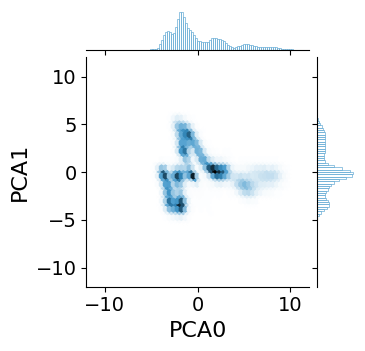

In [3]:
# make a hexbin plot of the latent space
dim1=0
dim2=1

grid = plot_latent_space_hexbin(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    pca=True,
    palette="coolwarm"
)
grid.set_axis_labels(f"PCA{dim1}", f"PCA{dim2}", fontsize=16)
grid.figure.get_axes()[0].tick_params(labelsize=14)
grid.figure.get_axes()[0].set_xlim((-12, 12))
grid.figure.get_axes()[0].set_ylim((-12, 12))

grid.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_pca_{dim1}_{dim2}_hexbin.pdf"), bbox_inches="tight")
print(f"saved figure to {os.path.join(figures_dir, f'{os.path.basename(latent_file)}_pca_{dim1}_{dim2}_hexbin.pdf')}")


## panel D
hexbin plot of the latent space for the covid RTC

In [4]:
### data loading covid RTC DE-Shaw data set
project_dir = "/home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies"
config_dir = os.path.join(project_dir, "Movies")
figures_dir = os.path.join(project_dir, "figures")
meta_file = os.path.join(project_dir, "cryoDRGN", "run_data.star")
jobtypes = {
    os.path.join(project_dir, "cryoDRGN", "run_data.star"): "cryoDRGN",
}
latent_file = os.path.join(project_dir, "cryoDRGN", "train_320", "z.24.pkl")

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
enable_tqdm = True

analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)

df_picked, ndim = HetRec.add_latent_space_coordinates(
    latent_file=latent_file,
    df_picked=df_picked,
)
df_picked, pca = HetRec.compute_PCA(
    df_picked=df_picked,
    ndim=ndim,
)
df_picked.tail()


loading metadata from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies/cryoDRGN/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies/cryoDRGN/run_data.star. determined file type: star


Dictionaries now contain 41146 reconstructed particles
added 41146 particles from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies/cryoDRGN/run_data.star


loading truth data: 100%|██████████| 166/166 [01:04<00:00,  2.56it/s, micrograph=000166.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 41146 particles and 49800 true particles
Added 49800 particles from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies/Movies
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 166
Number of micgrographs: 166
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 166/166 [00:10<00:00, 15.29it/s, precision=1, recall=0.887, multiplicity=0.893]  


time taken to compute precision: 10.997507572174072


,metadata_filename,ugraph_filename,position_x,position_y,euler_phi,euler_theta,euler_psi,ugraph_shape,defocusU,defocusV,...,latent_6,latent_7,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
41141,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000166.mrc,623.0,427.0,-2.479081,0.319182,2.284024,"(4000, 4000)",27512.144531,27475.599609,...,0.950691,0.646721,0.647302,-0.474526,-0.773674,-2.328943,-0.366014,0.128490,2.014372,2.227505
41142,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000166.mrc,2477.0,3475.0,-1.255542,1.212166,1.819059,"(4000, 4000)",27512.144531,27475.599609,...,-0.842706,-4.071475,-0.575741,-3.161300,-0.099902,-2.686502,-0.474613,3.327740,0.091995,-1.303255
41143,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000166.mrc,1717.0,1488.0,-1.577245,1.727690,2.269028,"(4000, 4000)",27512.144531,27475.599609,...,-1.307994,1.959712,-1.253991,1.312412,2.202405,2.106996,-0.872654,-0.105288,0.164121,1.868065
41144,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000166.mrc,3038.0,1088.0,-1.793902,2.514017,-2.839817,"(4000, 4000)",27512.144531,27475.599609,...,0.263249,3.179621,0.367678,0.858471,0.604232,1.116895,-0.995134,-0.881224,3.121236,-0.345546
41145,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000166.mrc,2448.0,3578.0,0.987162,1.452233,-2.832380,"(4000, 4000)",27512.144531,27475.599609,...,-0.844505,2.338212,-1.379845,0.776827,2.715952,2.622784,1.672950,-0.320895,2.014437,0.479581


saved figure to /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies/figures/z.24.pkl_pca_0_1_hexbin.pdf


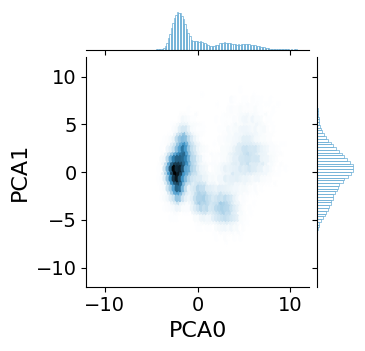

In [6]:
# make a hexbin plot of the latent space
dim1=0
dim2=1

grid = plot_latent_space_hexbin(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    pca=True,
    palette="coolwarm"
)
grid.set_axis_labels(f"PCA{dim1}", f"PCA{dim2}", fontsize=16)
grid.figure.get_axes()[0].tick_params(labelsize=14)
grid.figure.get_axes()[0].set_xlim((-12, 12))
grid.figure.get_axes()[0].set_ylim((-12, 12))

grid.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_pca_{dim1}_{dim2}_hexbin.pdf"), bbox_inches="tight")
print(f"saved figure to {os.path.join(figures_dir, f'{os.path.basename(latent_file)}_pca_{dim1}_{dim2}_hexbin.pdf')}")
